Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   

      z  
0  2.43  
1  2.31  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), objec

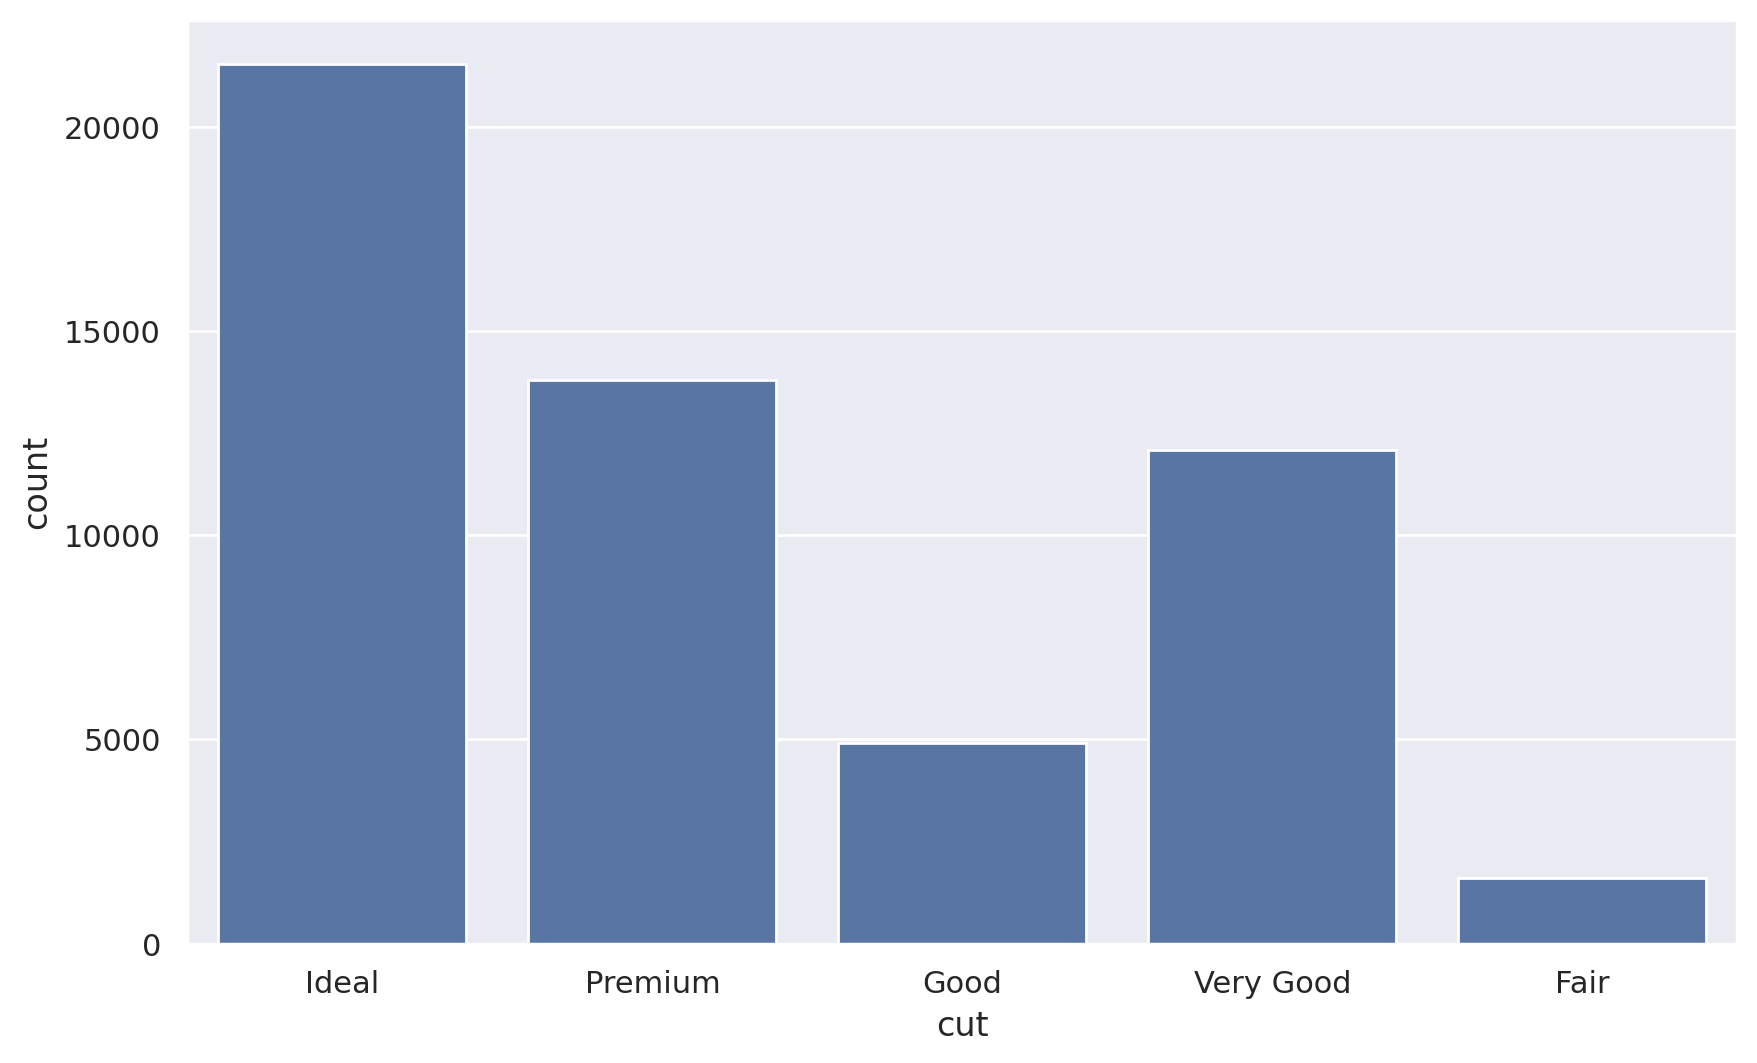

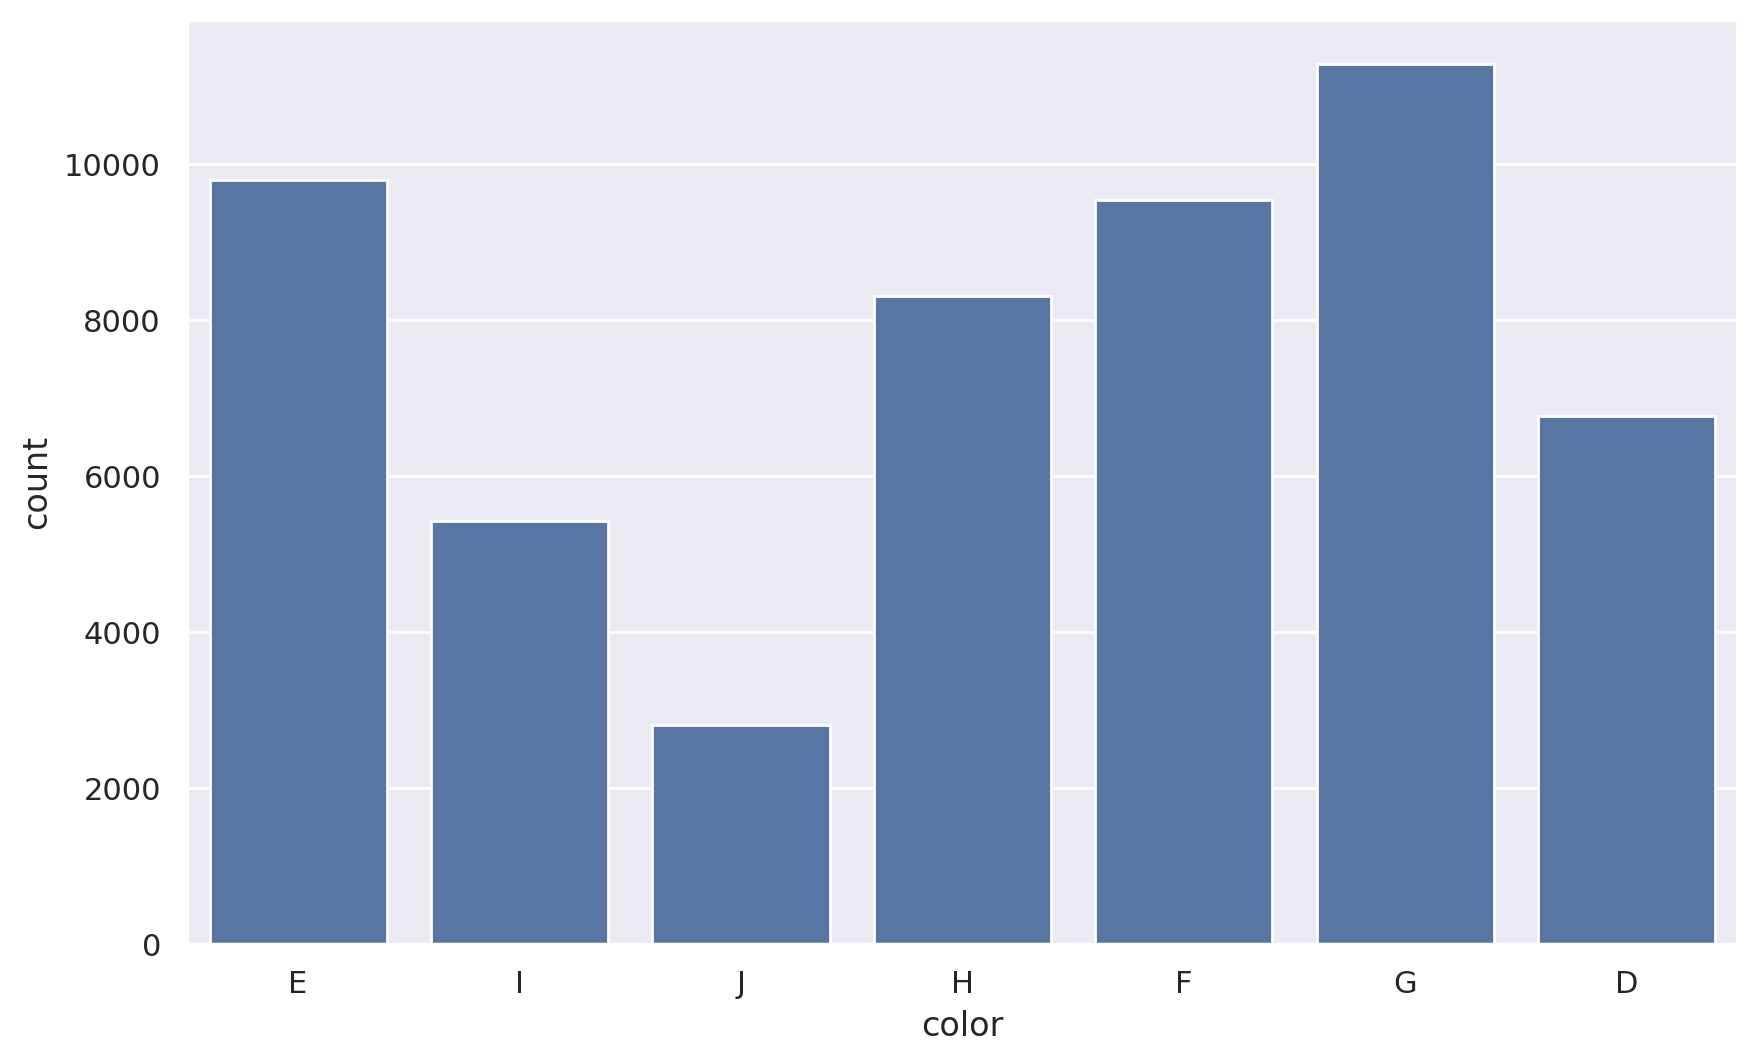

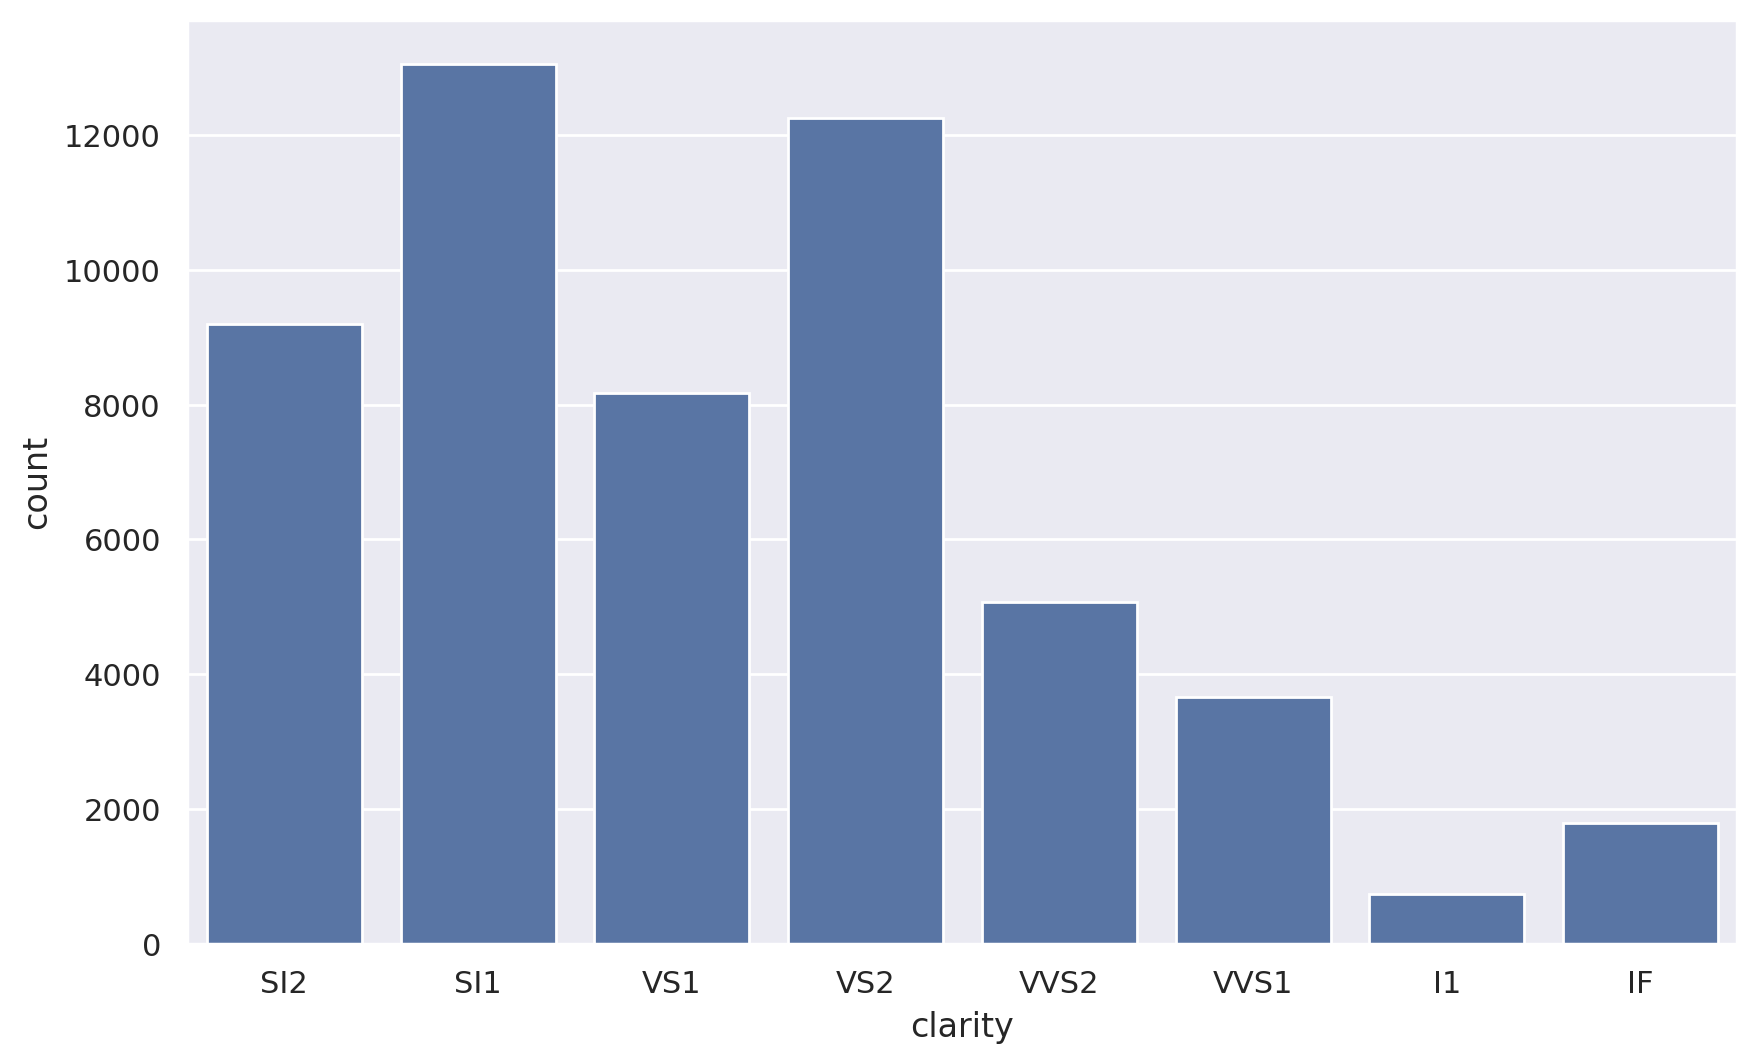

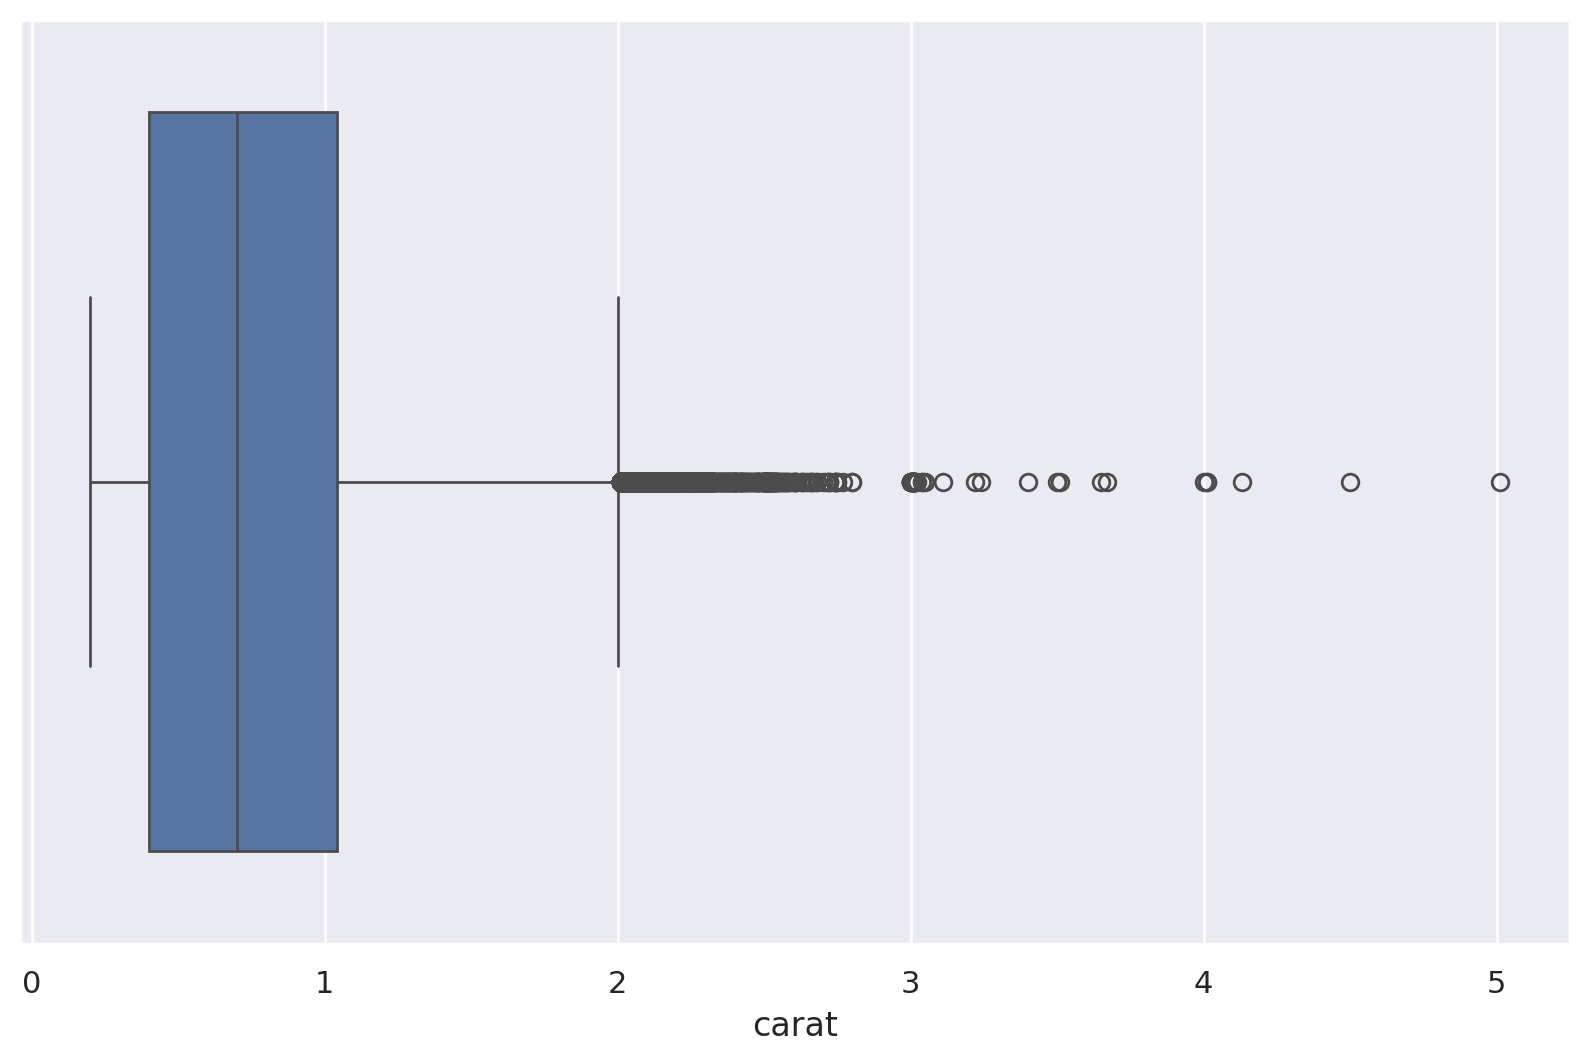

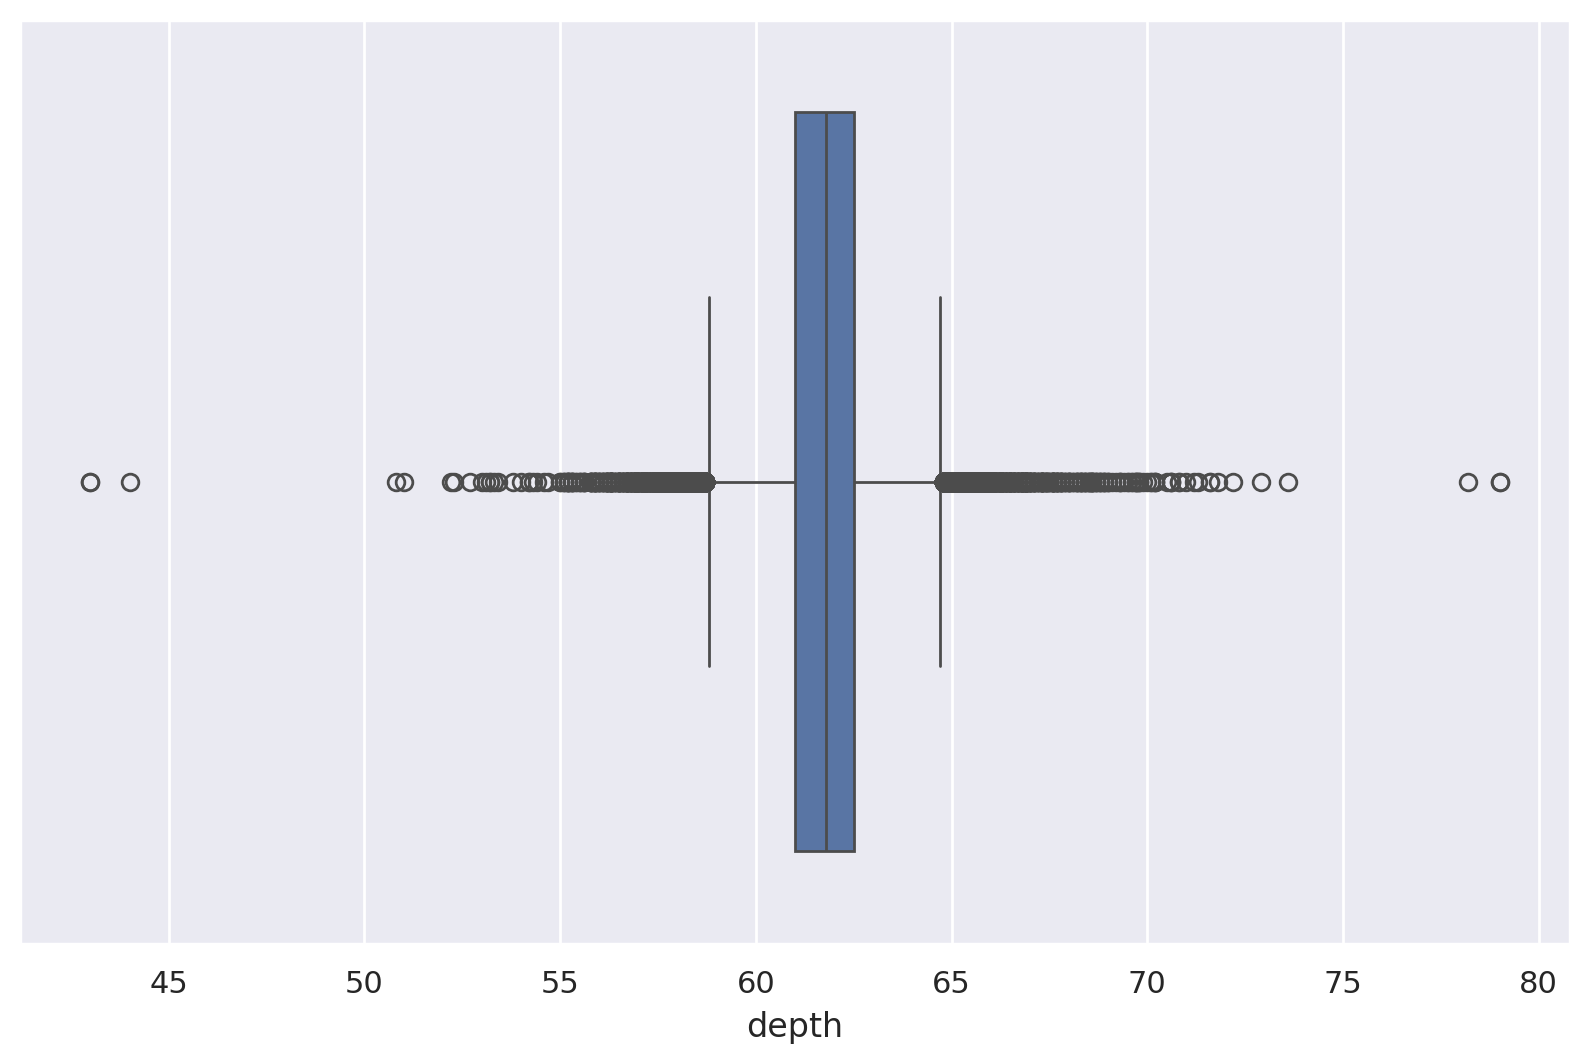

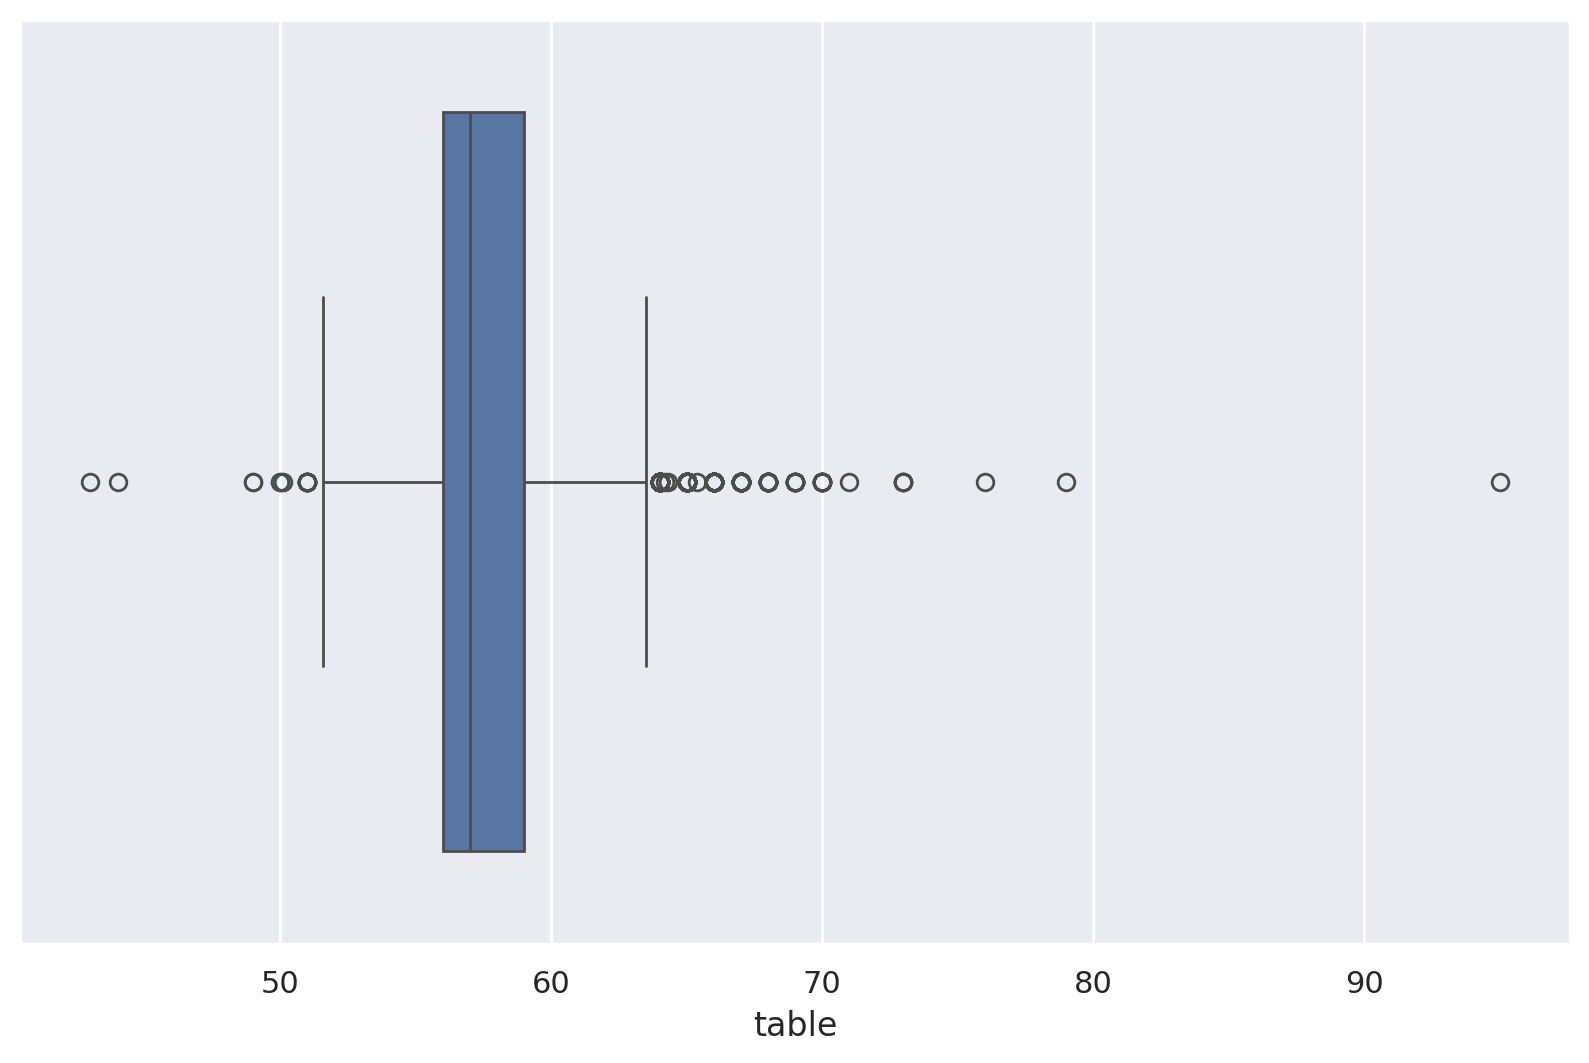

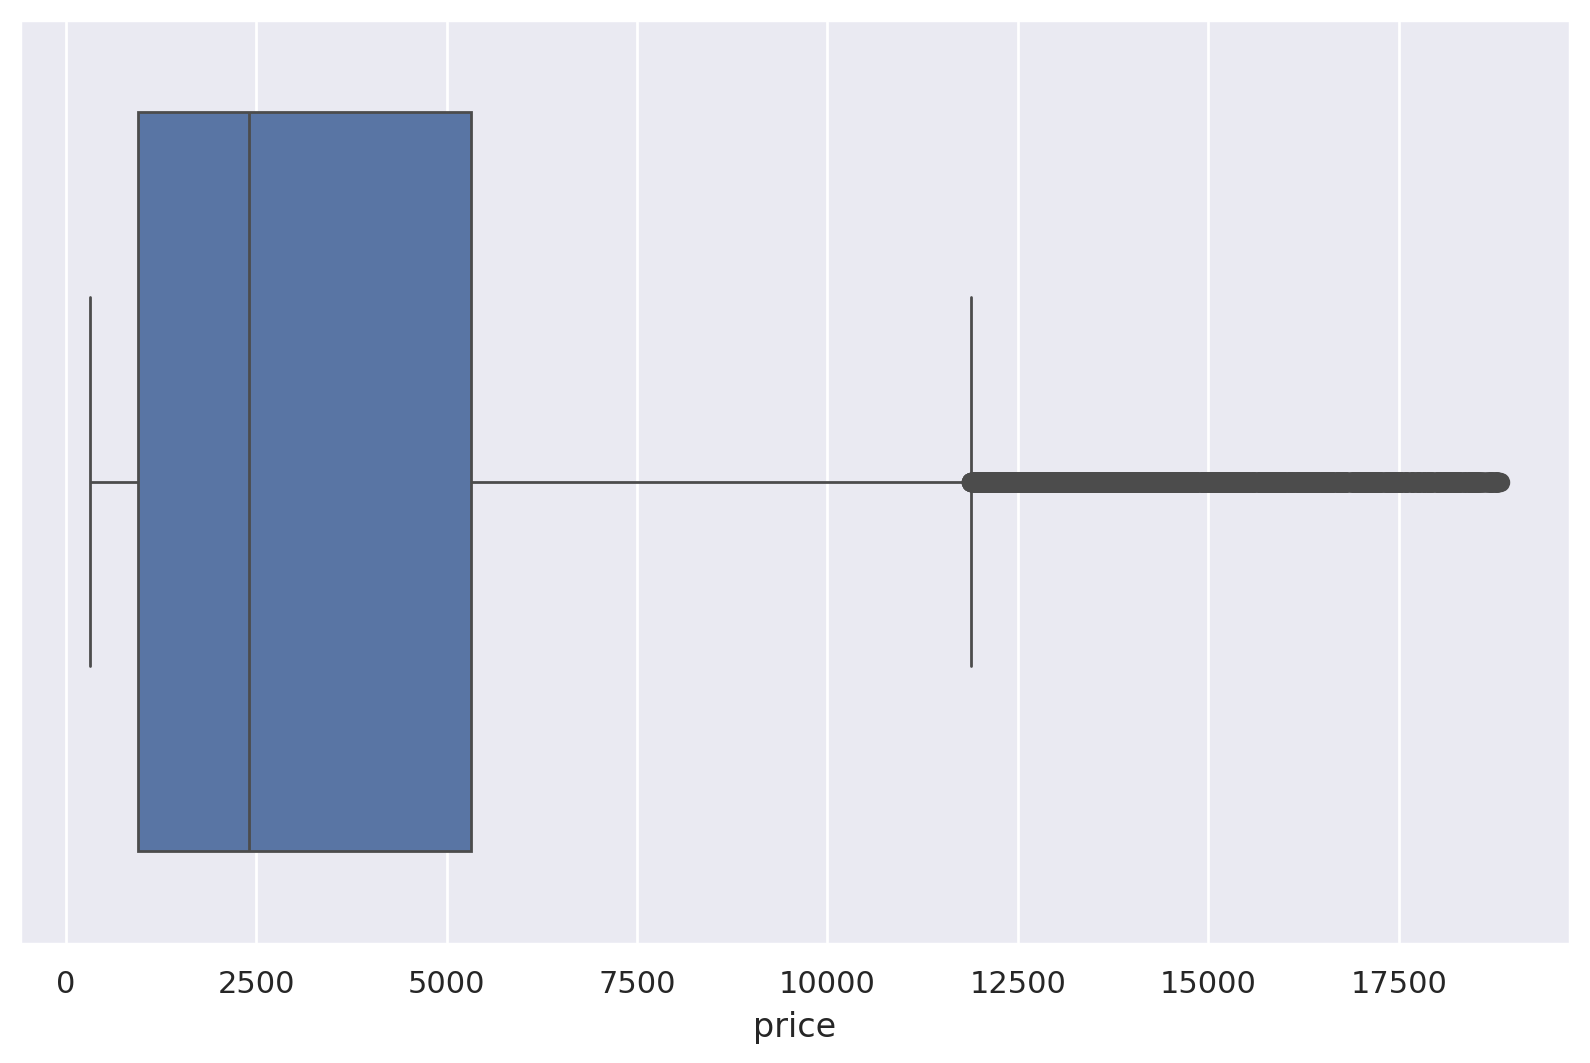

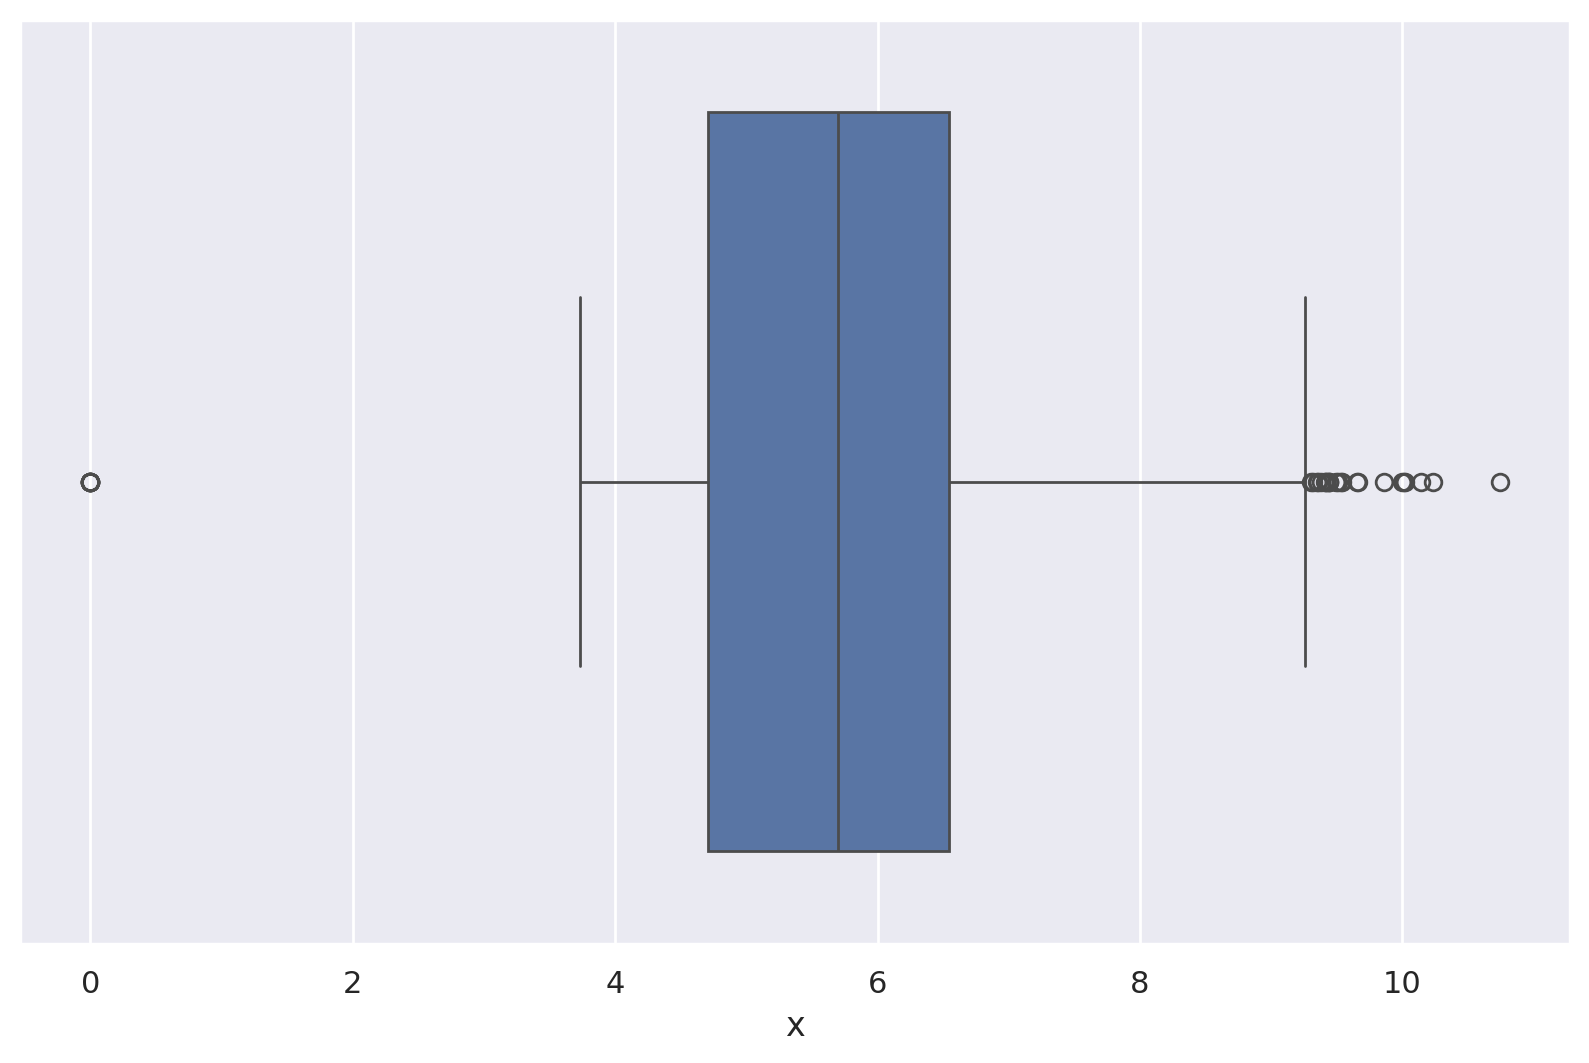

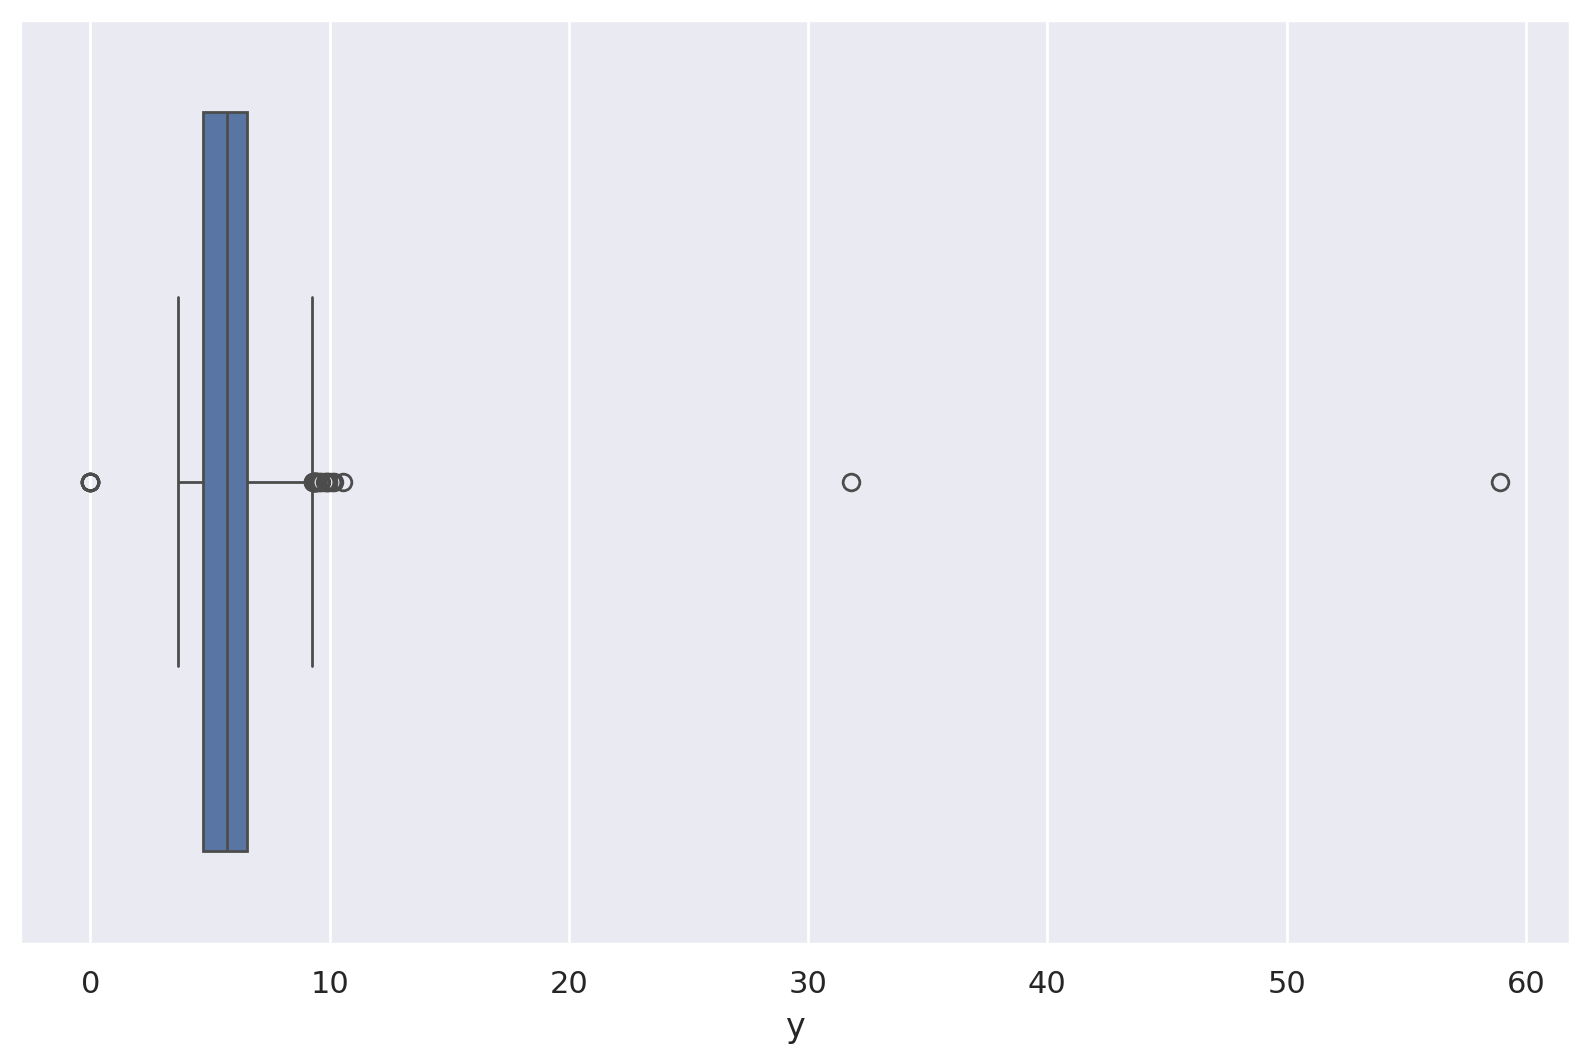

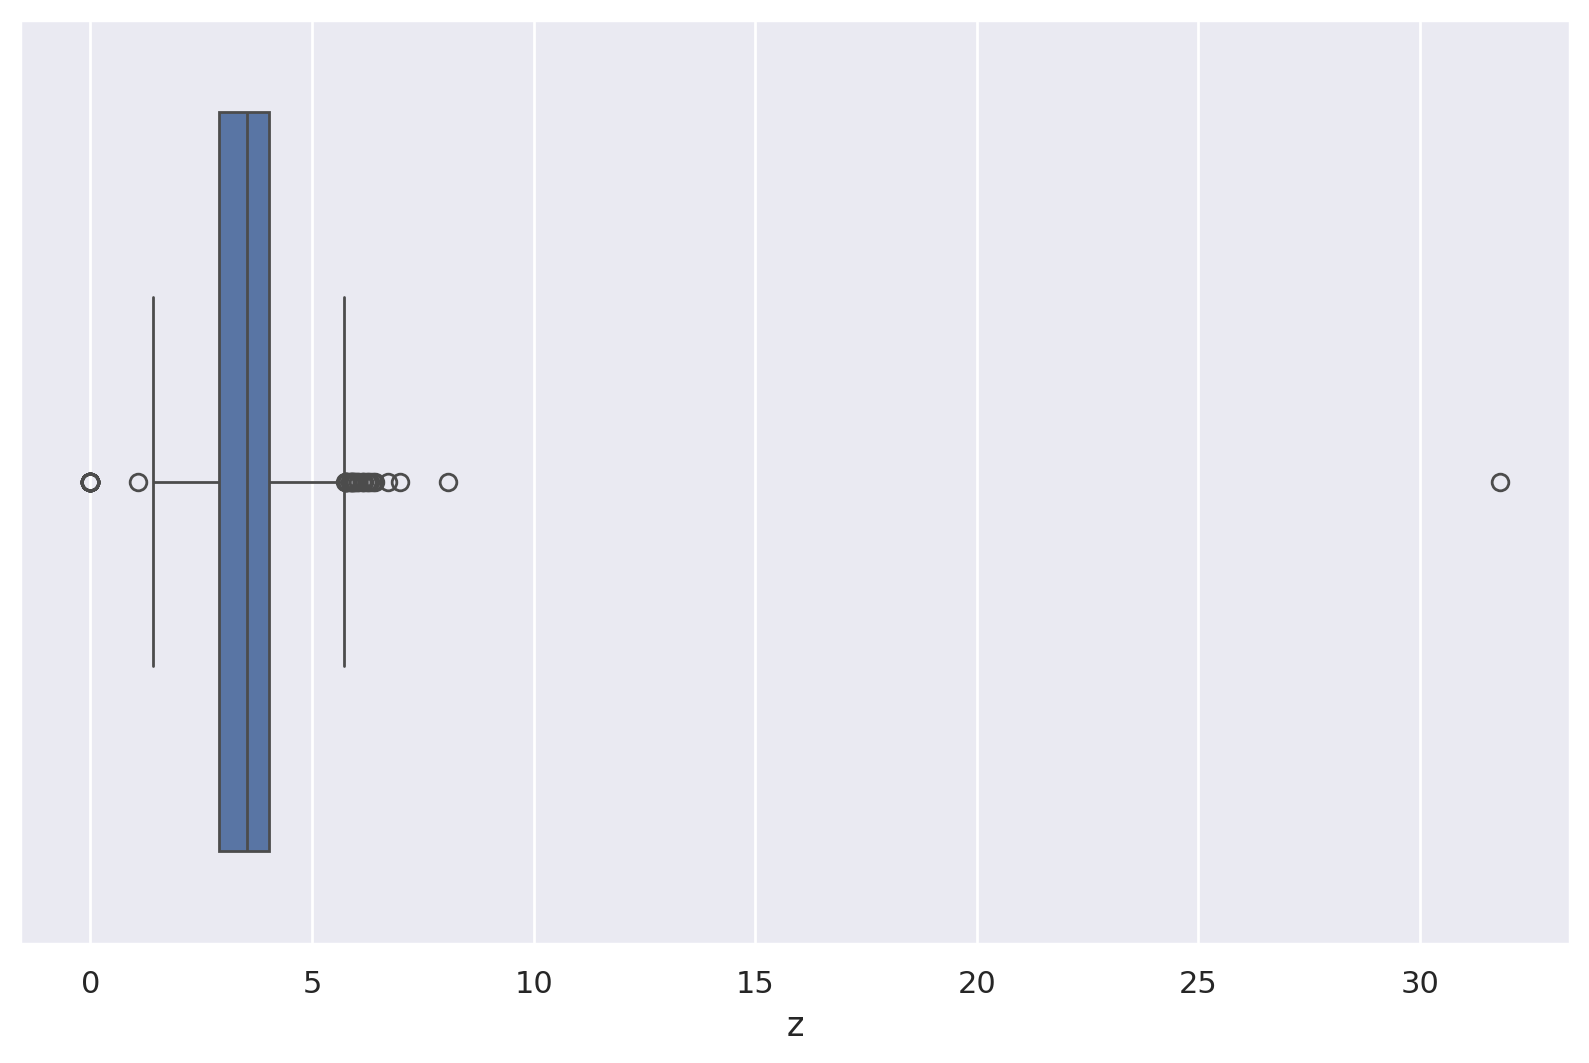

X_train size : (37758, 9)
X_test size : (16182, 9)
y_train size : (37758,)
y_test size : (16182,)


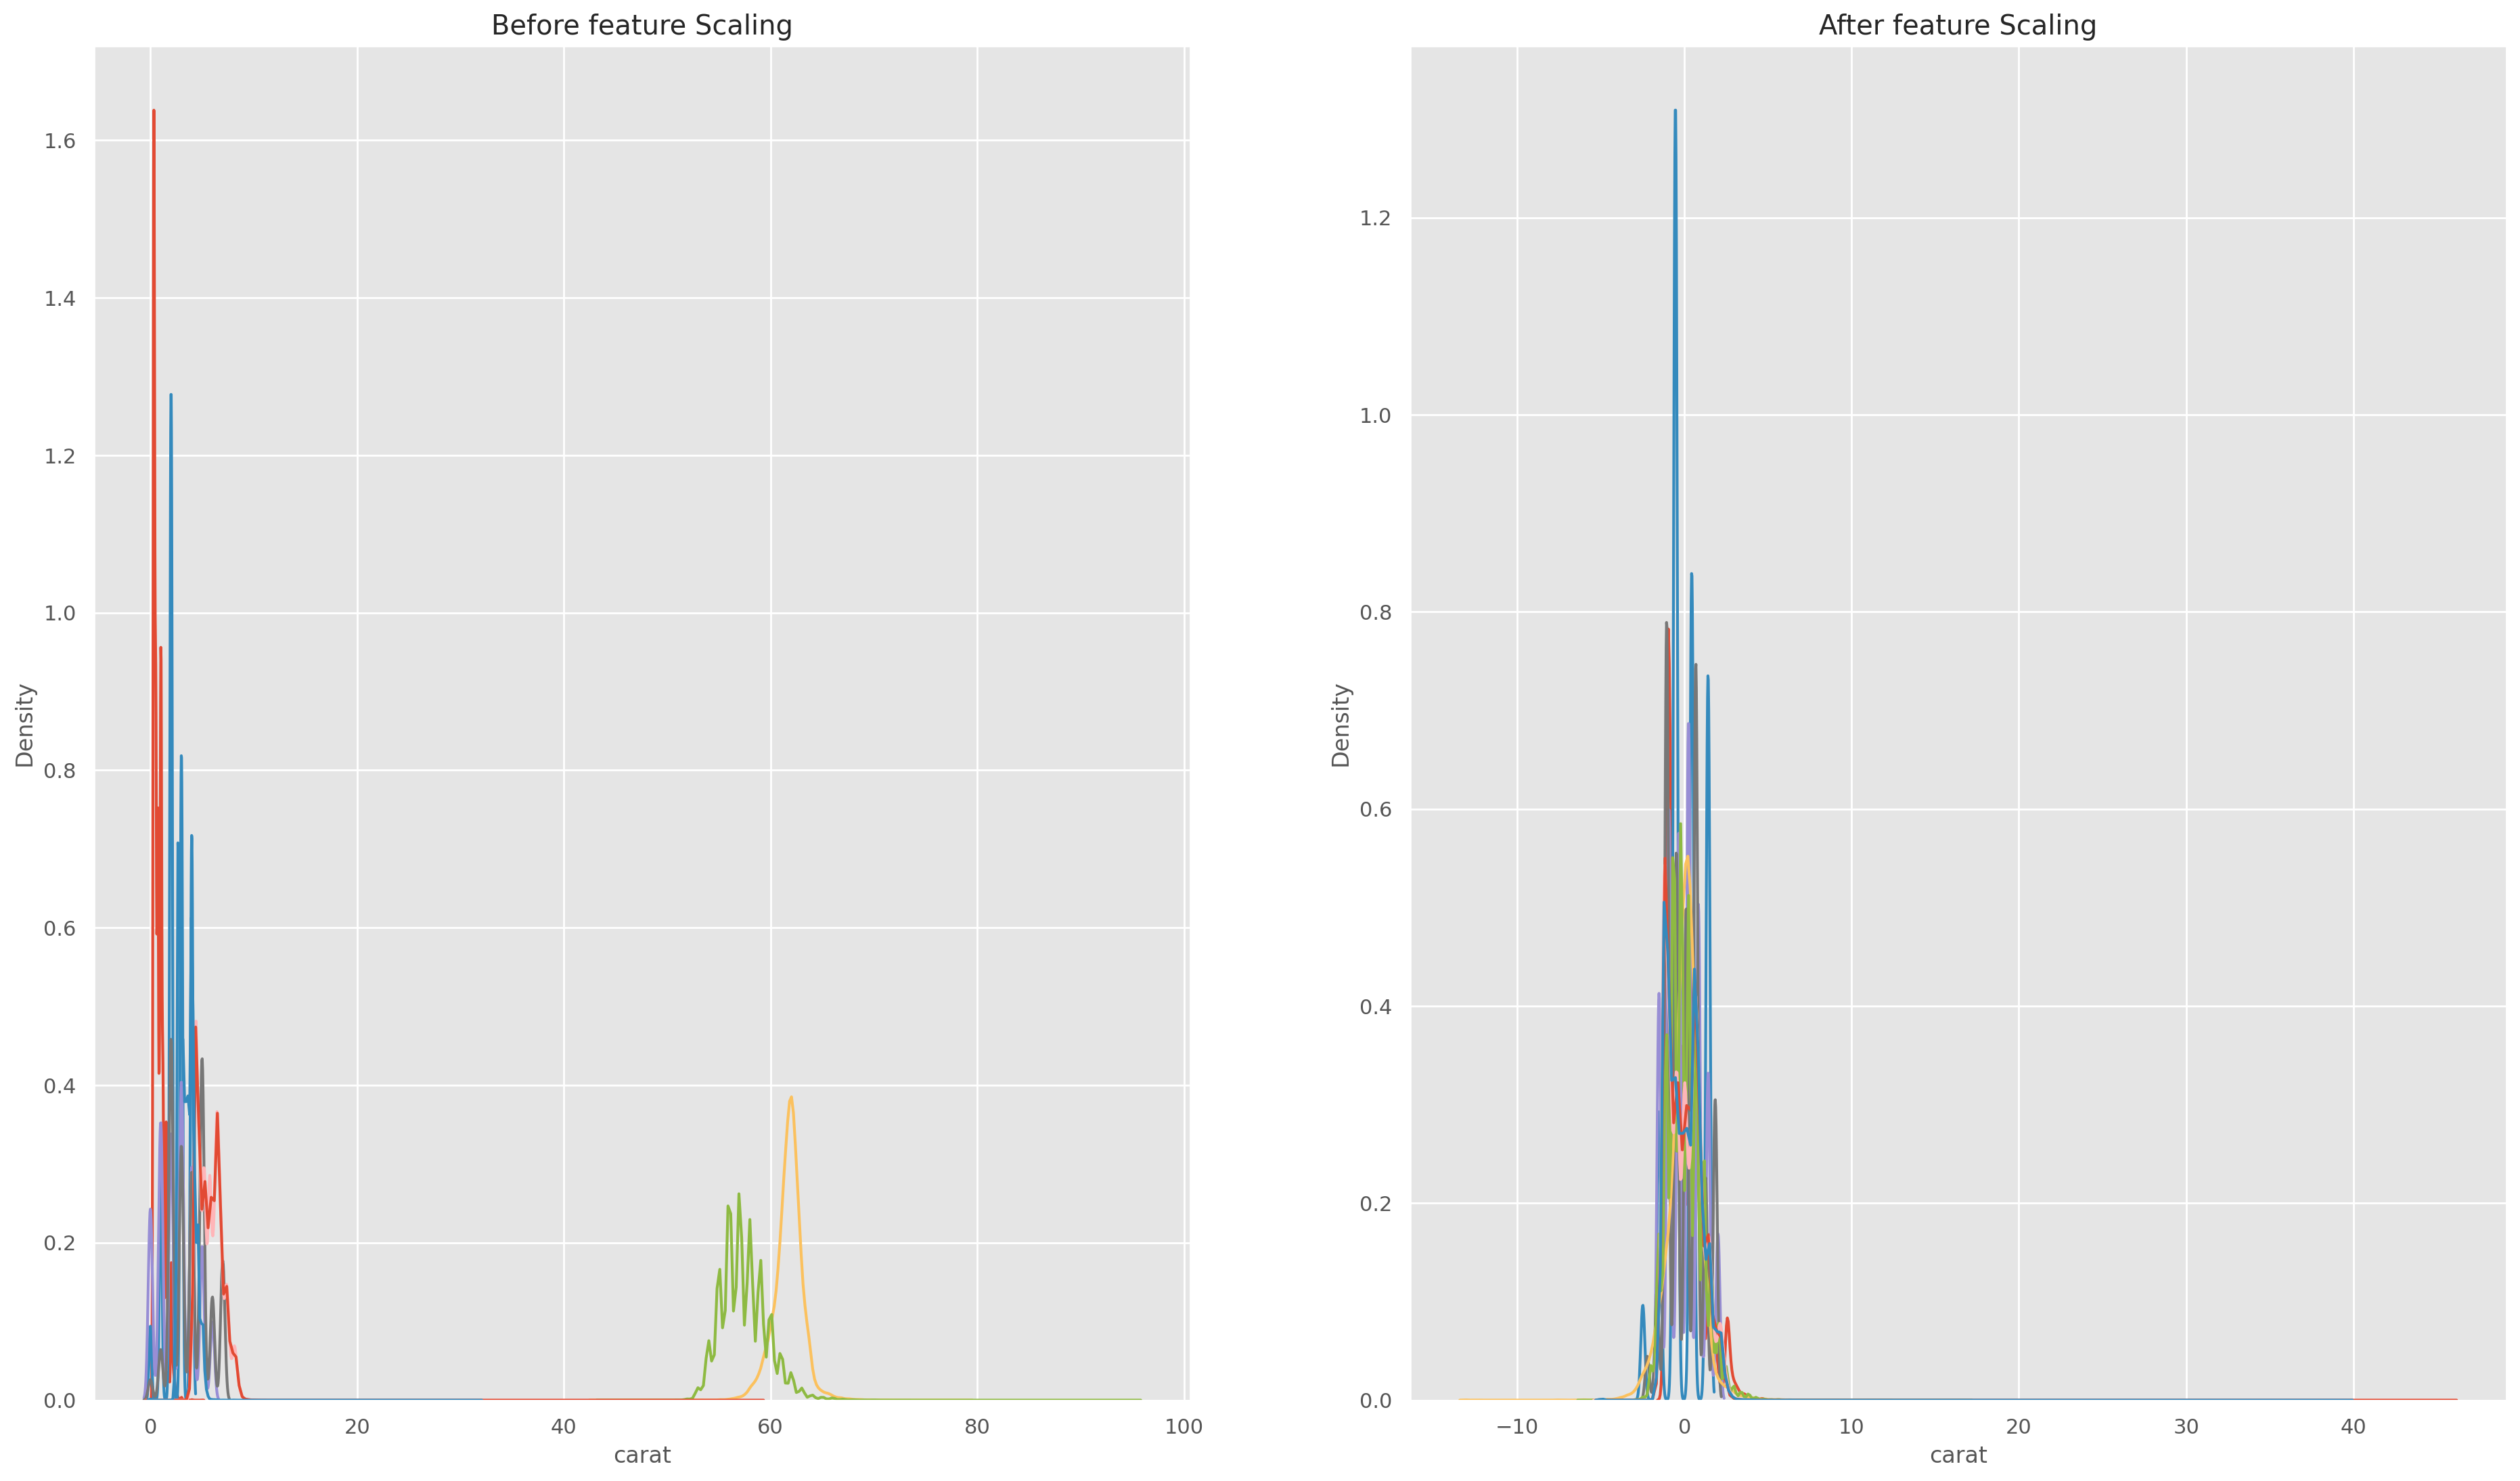

R^2 score for Train using sklearn: 0.8838780842365068
R^2 score for Test using sklearn: 0.8878187588744918

Mean Absolute Error for Train: 872.0510348697445
Mean Absolute Error for Test: 853.7910819184326

Mean Absolute Percentage Error for Train: 1.5814641367500504
Mean Absolute Percentage Error for Test: 1.4816394864517115
R^2 score for Train using mlp: 0.93076004004692
R^2 score for Test using mlp: 0.9328537040781504

Mean Absolute Error for Train: 587.7431213833947
Mean Absolute Error for Test: 571.8317102687195

Mean Absolute Percentage Error for Train: 0.1949282408440266
Mean Absolute Percentage Error for Test: 0.17473531407542156


In [4]:
### Context
#This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

### Content
'''
**price** price in US dollars (\\$326--\\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)
'''

# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
# loding the csv file as pandas dataframe

from google.colab import drive
drive.mount('/content/drive')

# 데이터 디렉토리 경로 설정
data_dir = '/content/drive/My Drive/과외/github_ml 발표/diamonds.csv'

diamonds = pd.read_csv(data_dir)
# Looking at the loaded data
print(diamonds.head(2))

# dropping the first column
diamonds = diamonds.drop(diamonds.columns[0], axis=1)

# code to directly delete first column, while loding the data from csv file
# diamonds = pd.read_csv('G:\My Research\CSV Files\diamonds.csv').iloc[:,1:]
diamonds.head()
# checking the datatypes and null values in the data
diamonds.info()
#**From the above, we can see that there are no null values in our dataset.**
# if there are null values presents in the data, then we can use imputer for filling those null values
# from sklearn.preprocessing import Imputer
# checking for the unique values and their total counts in the dataset,
# to get an insight about categorical and numerical variables in the dataset
for i in diamonds:
    print(diamonds[i].value_counts())

# defining the variables into Categorical and Numerical
#**Categorical Variables :** cut, color, clarity
#*Numerical Variables :** carat, depth, table, price, x, y, z
# defining the variables into Dependent and Independent
#**Dependent Variable :** price
#**Independent Variable :** carat, cut, color, clarity, depth, table, x, y, z
# Now we will see the distribution of variables
d_cat = diamonds[['cut', 'color', 'clarity']]
d_num = diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
d_num.describe()
#From the above graph we can see that there are many outliers present in our data, thus outlier treatment is necessary,
#but here, the target variable is Price and as we are predicting price of diamonds, then extreme values are possible, depending about the dimentions of the diamonds.
diamonds.price.describe()

# encoding categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diamonds['cut'] = le.fit_transform(diamonds['cut'])
diamonds['color'] = le.fit_transform(diamonds['color'])
diamonds['clarity'] = le.fit_transform(diamonds['clarity'])
diamonds.dtypes
#**Splitting the data into train and test**
# Splitting the data into dependent and independent variables
X=diamonds.drop('price', axis=1)
y=diamonds['price']

# Splitting into test and train data (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print('X_train size :',X_train.shape)
print('X_test size :',X_test.shape)
print('y_train size :',y_train.shape)
print('y_test size :',y_test.shape)



from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X_train)
scaled_df = pd.DataFrame(scaled_df, columns=X_train.columns)

#**Now we can see that the values of all independent variables lie in a comparable range**
#**Now our data is ready to fit into regression model**

# defining a function for regression model

# building and training the model with train data, using sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f'R^2 score for Train using sklearn: {lin_reg.score(X_train, y_train)}')
print(f'R^2 score for Test using sklearn: {lin_reg.score(X_test, y_test)}')

y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

print("\nMean Absolute Error for Train:", metrics.mean_absolute_error(y_pred_train,y_train))
print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test,y_test))
#mean_absolute_percentage_error
print("\nMean Absolute Percentage Error for Train:", metrics.mean_absolute_percentage_error(y_pred_train,y_train))
print("Mean Absolute Percentage Error for Test:", metrics.mean_absolute_percentage_error(y_pred_test,y_test))


from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
print(f'R^2 score for Train using mlp: {regr.score(X_train, y_train)}')
print(f'R^2 score for Test using mlp: {regr.score(X_test, y_test)}')

y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)

print("\nMean Absolute Error for Train:", metrics.mean_absolute_error(y_pred_train,y_train))
print("Mean Absolute Error for Test:", metrics.mean_absolute_error(y_pred_test,y_test))

#mean_absolute_percentage_error
print("\nMean Absolute Percentage Error for Train:", metrics.mean_absolute_percentage_error(y_pred_train,y_train))
print("Mean Absolute Percentage Error for Test:", metrics.mean_absolute_percentage_error(y_pred_test,y_test))
